In [1]:
import pandas as pd
import numpy as np
import os
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from tqdm.notebook import tqdm
from scipy.stats import kde
from KDEpy import FFTKDE

In [2]:
key_distance = pd.read_excel('C:/Research Activities/Dataset/Keyboard_distance.xlsx', header=0)

In [3]:
def get_timings_KIT(keys_in_pipeline, search_key, search_key_timing):
    mask = np.ones(len(keys_in_pipeline))
    keys_in_pipeline = np.asarray(keys_in_pipeline)
    for i, (key, timing) in enumerate(keys_in_pipeline):
          if(search_key==key):
            mask[i] = 0
            non_zero_indices = np.nonzero(mask) 

            if(len(non_zero_indices)>0):
                keys_in_pipeline = keys_in_pipeline[non_zero_indices]
            else:
                  keys_in_pipeline = []

            return keys_in_pipeline, timing, search_key_timing
    return keys_in_pipeline, None, None

# function to get KIT data frame with key, press_time, release_time for a given user
def get_dataframe_KIT(data):
    """ Input: data  Output: Dataframe with (key, press_time, release_time)""" 
    
    keys_in_pipeline = []
    result_key = []
    press = []
    release = []
    for row_idx in range(len(data)):
        keys_in_pipeline = list(keys_in_pipeline)
        curr_key = data[row_idx][1]
        curr_direction = data[row_idx][2]
        curr_timing = data[row_idx][3]

        if(curr_direction==0):
            keys_in_pipeline.append([curr_key, curr_timing])

        if(curr_direction==1):
            keys_in_pipeline, curr_start, curr_end = get_timings_KIT(keys_in_pipeline, curr_key, curr_timing)
            if(curr_start is None):
                continue
            else:
                result_key.append(curr_key)
                press.append(curr_start)
                release.append(curr_end)

    resultant_data_frame = pd.DataFrame(list(zip(result_key, press, release)),
               columns =['Key', 'Press_Time', 'Release_Time']) 
    return resultant_data_frame 

In [4]:
def get_DIG_features(data):
  
    result = [{'Keys': str(data[row_idx][0])+','+str(data[row_idx + 1][0]), 
               'Holdtime1': (((data[row_idx][2]-data[row_idx][1])).microseconds)/1000,
            'Holdtime2': (((data[row_idx + 1][2]-data[row_idx + 1][1])).microseconds)/1000,
               'F1': (((data[row_idx+1][1]-data[row_idx][2])).microseconds)/1000,
              'F2': (((data[row_idx+1][1]-data[row_idx][1])).microseconds)/1000,
              'F3': (((data[row_idx+1][2]-data[row_idx][2])).microseconds)/1000,
              'F4': (((data[row_idx+1][2]-data[row_idx][1])).microseconds)/1000} 
              for row_idx in range(0, len(data)) 
              if (row_idx + 1 < len(data))]
        
    df = pd.DataFrame(result)
    
    return df

In [5]:
def apply_distance(data1, data2):
#     data_combine =  data1.join(data2.set_index('Keys'), on='Keys', how='left').sort_index(axis=0)
    data_combine = data1.merge(data2, on ='Keys', validate = 'm:m', how ='inner')
    
    return data_combine

In [8]:
# data_dir_desktop = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop/'
# target_dir = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_samples/'

# user_files_desktop = os.listdir(data_dir_desktop)
# for i in tqdm(range(len(user_files_desktop))):
#         user_file_desktop = user_files_desktop[i]
#         curr_user_ind_desktop = int(user_file_desktop[:user_file_desktop.find('_')])
#         data_frame_desktop = pd.read_csv(data_dir_desktop+user_file_desktop, header=0)
#         data_frame_desktop.iloc[:,3] =  pd.to_datetime(data_frame_desktop.iloc[:,3])
#         user_timing_desktop = get_dataframe_KIT(data_frame_desktop.values).values
#         user_features = get_DIG_features(user_timing_desktop)
#         user_features_with_distance = apply_distance(user_features, key_distance)
        
#         f = open(target_dir+'User_'+str(curr_user_ind_desktop)+'.csv', 'w', newline='')
#         user_features_with_distance.to_csv(f)
#         f.close()

  0%|          | 0/116 [00:00<?, ?it/s]

In [10]:
# data_dir_mobile = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone/'
# target_dir = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone_samples/'

# user_files_mobile = os.listdir(data_dir_mobile)
# for i in tqdm(range(len(user_files_mobile))):
#         user_file_mobile = user_files_mobile[i]
#         curr_user_ind_mobile = int(user_file_mobile[:user_file_mobile.find('_')])
#         data_frame_mobile = pd.read_csv(data_dir_mobile+user_file_mobile, header=0)
#         data_frame_mobile.iloc[:,3] =  pd.to_datetime(data_frame_mobile.iloc[:,3])
#         user_timing_mobile = get_dataframe_KIT(data_frame_mobile.values).values
#         user_features = get_DIG_features(user_timing_mobile)
#         user_features_with_distance = apply_distance(user_features, key_distance)
        
#         f = open(target_dir+'User_'+str(curr_user_ind_mobile)+'.csv', 'w', newline='')
#         user_features_with_distance.to_csv(f)
#         f.close()

  0%|          | 0/116 [00:00<?, ?it/s]

In [11]:
# data_dir_tablet = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Tablet/'
# target_dir = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Tablet_samples/'

# user_files_tablet = os.listdir(data_dir_tablet)
# for i in tqdm(range(len(user_files_tablet))):
#         user_file_tablet = user_files_tablet[i]
#         curr_user_ind_tablet = int(user_file_tablet[:user_file_tablet.find('_')])
#         data_frame_tablet = pd.read_csv(data_dir_tablet+user_file_tablet, header=0)
#         data_frame_tablet.iloc[:,3] =  pd.to_datetime(data_frame_tablet.iloc[:,3])
#         user_timing_tablet = get_dataframe_KIT(data_frame_tablet.values).values
#         user_features = get_DIG_features(user_timing_tablet)
#         user_features_with_distance = apply_distance(user_features, key_distance)
        
#         f = open(target_dir+'User_'+str(curr_user_ind_tablet)+'.csv', 'w', newline='')
#         user_features_with_distance.to_csv(f)
#         f.close()

  0%|          | 0/117 [00:00<?, ?it/s]

In [117]:
data_dir_mobile = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone_samples/'
user_files_mobile = os.listdir(data_dir_mobile)

user = []
max_holdtime = []
max_F1 = []
max_F2 = []
max_F3 = []
max_F4 = []
for i in tqdm(range(len(user_files_mobile))):
        user_file_mobile = user_files_mobile[i]
        df_mobile = pd.read_csv(data_dir_mobile+user_file_mobile, header=0)
        df_mobile_dis_1 = df_mobile[df_mobile['Distance']==3]
        user.append(int(user_file_mobile[user_file_mobile.find('_')+1:user_file_mobile.find('.')]))
        max_holdtime.append(df_mobile_dis_1.iloc[:,2].max()) 
        max_F1.append(df_mobile_dis_1.iloc[:,4].max()) 
        max_F2.append(df_mobile_dis_1.iloc[:,5].max())
        max_F3.append(df_mobile_dis_1.iloc[:,6].max())
        max_F4.append(df_mobile_dis_1.iloc[:,7].max())
        
max_df_mobile = pd.DataFrame(list(zip(user,max_holdtime,max_F1,max_F2,max_F3,max_F4)), columns=['user','KH','F1','F2','F3', 'F4'])

  0%|          | 0/116 [00:00<?, ?it/s]

In [121]:
data_dir_tablet = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Tablet_samples/'
user_files_tablet = os.listdir(data_dir_tablet)

user = []
max_holdtime = []
max_F1 = []
max_F2 = []
max_F3 = []
max_F4 = []
for i in tqdm(range(len(user_files_tablet))):
        user_file_tablet = user_files_tablet[i]
        df_tablet = pd.read_csv(data_dir_tablet+user_file_tablet, header=0)
        df_tablet_dis_1 = df_tablet[df_tablet['Distance']==2]
        user.append(int(user_file_tablet[user_file_tablet.find('_')+1:user_file_tablet.find('.')]))
        max_holdtime.append(df_tablet_dis_1.iloc[:,2].max()) 
        max_F1.append(df_tablet_dis_1.iloc[:,4].max()) 
        max_F2.append(df_tablet_dis_1.iloc[:,5].max())
        max_F3.append(df_tablet_dis_1.iloc[:,6].max())
        max_F4.append(df_tablet_dis_1.iloc[:,7].max())
        
max_df_tablet = pd.DataFrame(list(zip(user,max_holdtime,max_F1,max_F2,max_F3,max_F4)), columns=['user','KH','F1','F2','F3', 'F4'])

  0%|          | 0/117 [00:00<?, ?it/s]

In [111]:
data_dir_desktop = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_samples/'
user_files_desktop = os.listdir(data_dir_desktop)

user = []
max_holdtime = []
max_F1 = []
max_F2 = []
max_F3 = []
max_F4 = []
for i in tqdm(range(len(user_files_desktop))):
        user_file_desktop = user_files_desktop[i]
        df_desktop = pd.read_csv(data_dir_desktop+user_file_desktop, header=0)
        df_desktop_dis_2 = df_desktop[df_desktop['Distance']==3]
        user.append(int(user_file_desktop[user_file_desktop.find('_')+1:user_file_desktop.find('.')]))
        max_holdtime.append(df_desktop_dis_2.iloc[:,2].max()) 
        max_F1.append(df_desktop_dis_2.iloc[:,4].max()) 
        max_F2.append(df_desktop_dis_2.iloc[:,5].max())
        max_F3.append(df_desktop_dis_2.iloc[:,6].max())
        max_F4.append(df_desktop_dis_2.iloc[:,7].max())
        
max_df_desktop = pd.DataFrame(list(zip(user,max_holdtime,max_F1,max_F2,max_F3,max_F4)), columns=['user','KH','F1','F2','F3', 'F4'])

  0%|          | 0/116 [00:00<?, ?it/s]

In [112]:
max_df_desktop[max_df_desktop['F4']==max_df_desktop['F4'].max()]

,user,KH,F1,F2,F3,F4
3,101,774.0,967.0,999.0,993.0,999.0
8,106,855.0,989.0,979.0,983.0,999.0
10,108,999.0,998.0,983.0,998.0,999.0
12,11,883.0,954.0,977.0,991.0,999.0
28,2,925.0,954.0,994.0,993.0,999.0
43,33,424.0,985.0,999.0,983.0,999.0
45,35,462.0,983.0,983.0,999.0,999.0
59,48,216.0,985.0,920.0,921.0,999.0
81,68,593.0,938.0,948.0,968.0,999.0
94,8,891.0,953.0,811.0,734.0,999.0


In [118]:
max_df_mobile[max_df_mobile['F4']==max_df_mobile['F4'].max()]

,user,KH,F1,F2,F3,F4
67,55,156.0,989.0,945.0,922.0,999.0
70,58,597.0,987.0,961.0,973.0,999.0
100,85,142.0,832.0,951.0,880.0,999.0


In [122]:
max_df_tablet[max_df_tablet['F4']==max_df_tablet['F4'].max()]

,user,KH,F1,F2,F3,F4
34,24,885.0,982.0,995.0,918.0,999.0
66,53,522.0,935.0,958.0,942.0,999.0
70,57,563.0,990.0,917.0,951.0,999.0
98,82,153.0,968.0,960.0,942.0,999.0
106,9,179.0,978.0,967.0,987.0,999.0


In [32]:
data_dir_desktop = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_samples/'
all_users_desktop_F1 = pd.DataFrame()
user_files = os.listdir(data_dir_desktop)
for i in tqdm(range(len(user_files))):
        user_file = user_files[i]
        curr_user_ind = int(user_file[user_file.find('_')+1:user_file.find('.')])
        data_frame = pd.read_csv(data_dir_desktop+user_file, header=0)
        data_frame['User'] = curr_user_ind
        data_frame['F1'] = data_frame['F1']/999
        df_F1 = data_frame[['User','Keys','F1','Distance','Hands']]
        all_users_desktop_F1 = all_users_desktop_F1.append(df_F1, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [33]:
data_dir_mobile = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone_samples/'
all_users_mobile_F1 = pd.DataFrame()
user_files_mobile = os.listdir(data_dir_mobile)
for i in tqdm(range(len(user_files_mobile))):
        user_file_mobile = user_files_mobile[i]
        curr_user_ind_mobile = int(user_file_mobile[user_file_mobile.find('_')+1:user_file_mobile.find('.')])
        data_frame = pd.read_csv(data_dir_mobile+user_file_mobile, header=0)
        data_frame['User'] = curr_user_ind_mobile
        data_frame['F1'] = data_frame['F1']/999
        df_F1 = data_frame[['User','Keys','F1','Distance','Hands']]
        all_users_mobile_F1 = all_users_mobile_F1.append(df_F1, ignore_index=True)

  0%|          | 0/116 [00:00<?, ?it/s]

In [34]:
data_dir_tablet = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Tablet_samples/'
all_users_tablet_F1 = pd.DataFrame()
user_files_tablet = os.listdir(data_dir_tablet)
for i in tqdm(range(len(user_files_tablet))):
        user_file_tablet = user_files_tablet[i]
        curr_user_ind_tablet = int(user_file_tablet[user_file_tablet.find('_')+1:user_file_tablet.find('.')])
        data_frame = pd.read_csv(data_dir_tablet+user_file_tablet, header=0)
        data_frame['User'] = curr_user_ind_tablet
        data_frame['F1'] = data_frame['F1']/999
        df_F1 = data_frame[['User','Keys','F1','Distance','Hands']]
        all_users_tablet_F1 = all_users_tablet_F1.append(df_F1, ignore_index=True)

  0%|          | 0/117 [00:00<?, ?it/s]

In [35]:
# df_sub_desk_dis_1_F1  = all_users_dis_1_F1.sample(frac = 0.5, random_state= 10)
# x_train,x_test = train_test_split(df_sub_desk_dis_1_F1['F1'], test_size=0.4, random_state=10)
# x = np.array(x_train)[:, np.newaxis]
# y = np.array(x_test)[:, np.newaxis]

In [36]:
# model = KernelDensity()
# model.fit(x)
# log_dens = model.score_samples(y)

In [37]:
# plt.plot(y,np.exp(log_dens))
# plt.show()

In [38]:
# bandwidths = [0.005, 0.01, 0.05, 0.1, 0.5, 1]
# fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
# plt_ind = np.arange(6) + 231

# for b, ind in zip(bandwidths, plt_ind):
#     kde_model = KernelDensity(kernel='gaussian', bandwidth=b)
#     kde_model.fit(x)
#     score = kde_model.score_samples(y)
#     plt.subplot(ind)
#     plt.plot(y, np.exp(score), c='blue')
#     plt.title("h="+str(b))

# fig.subplots_adjust(hspace=0.5, wspace=.3)
# plt.show()

In [39]:
# bandwidth = np.arange(0.01, 0.1, .01)
# kde = KernelDensity(kernel='gaussian')
# grid = GridSearchCV(kde, {'bandwidth': bandwidth})
# grid.fit(x)

# kde = grid.best_estimator_
# print("optimal bandwidth: " + "{:.2f}".format(kde.bandwidth))

In [40]:
# def my_scores(estimator, X):
#     scores = estimator.score_samples(X)
    
#     scores = scores[scores != float('-inf')]
    
#     return np.mean(scores)

# kernels = ['cosine', 'epanechnikov', 'exponential', 'gaussian', 'linear', 'tophat']
# h_vals = np.arange(0.01, 0.1, 0.01)

# grid = GridSearchCV(KernelDensity(),{'bandwidth': h_vals, 'kernel': kernels},scoring=my_scores)
# grid.fit(x)
# best_kde = grid.best_estimator_
# print("Best Kernel: " + best_kde.kernel+" h="+"{:.2f}".format(best_kde.bandwidth))

In [41]:
def kl_divergence(p, q):
    if len(p)>len(q):
        p = p[0:len(q)]
    elif len(q)>len(p):
        q = q[0:len(p)]
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [43]:
User_1_Dis_1_desktop = all_users_desktop_F1[(all_users_desktop_F1['User']==1) & (all_users_desktop_F1['Distance']==1) & (all_users_desktop_F1['Hands']!= 'LR')]
User_1_Dis_2_desktop = all_users_desktop_F1[(all_users_desktop_F1['User']==1) & (all_users_desktop_F1['Distance']==2) & (all_users_desktop_F1['Hands']!= 'LR')]
User_1_Dis_3_desktop = all_users_desktop_F1[(all_users_desktop_F1['User']==1) & (all_users_desktop_F1['Distance']==3) & (all_users_desktop_F1['Hands']!= 'LR')]

User_2_Dis_1_desktop = all_users_desktop_F1[(all_users_desktop_F1['User']==2) & (all_users_desktop_F1['Distance']==1) & (all_users_desktop_F1['Hands']!= 'LR')]
User_2_Dis_2_desktop = all_users_desktop_F1[(all_users_desktop_F1['User']==2) & (all_users_desktop_F1['Distance']==2) & (all_users_desktop_F1['Hands']!= 'LR')]
User_2_Dis_3_desktop = all_users_desktop_F1[(all_users_desktop_F1['User']==2) & (all_users_desktop_F1['Distance']==3) & (all_users_desktop_F1['Hands']!= 'LR')]

User_45_Dis_1_desktop = all_users_desktop_F1[(all_users_desktop_F1['User']==45) & (all_users_desktop_F1['Distance']==1) & (all_users_desktop_F1['Hands']!= 'LR')]
User_45_Dis_2_desktop = all_users_desktop_F1[(all_users_desktop_F1['User']==45) & (all_users_desktop_F1['Distance']==2) & (all_users_desktop_F1['Hands']!= 'LR')]
User_45_Dis_3_desktop = all_users_desktop_F1[(all_users_desktop_F1['User']==45) & (all_users_desktop_F1['Distance']==3) & (all_users_desktop_F1['Hands']!= 'LR')]

In [44]:
User_1_Dis_1_mobile = all_users_mobile_F1[(all_users_mobile_F1['User']==1) & (all_users_mobile_F1['Distance']==1) & (all_users_mobile_F1['Hands']!= 'LR')]
User_1_Dis_2_mobile = all_users_mobile_F1[(all_users_mobile_F1['User']==1) & (all_users_mobile_F1['Distance']==2) & (all_users_mobile_F1['Hands']!= 'LR')]
User_1_Dis_3_mobile = all_users_mobile_F1[(all_users_mobile_F1['User']==1) & (all_users_mobile_F1['Distance']==3) & (all_users_mobile_F1['Hands']!= 'LR')]

User_2_Dis_1_mobile = all_users_mobile_F1[(all_users_mobile_F1['User']==2) & (all_users_mobile_F1['Distance']==1) & (all_users_mobile_F1['Hands']!= 'LR')]
User_2_Dis_2_mobile = all_users_mobile_F1[(all_users_mobile_F1['User']==2) & (all_users_mobile_F1['Distance']==2) & (all_users_mobile_F1['Hands']!= 'LR')]
User_2_Dis_3_mobile = all_users_mobile_F1[(all_users_mobile_F1['User']==2) & (all_users_mobile_F1['Distance']==3) & (all_users_mobile_F1['Hands']!= 'LR')]

User_45_Dis_1_mobile = all_users_mobile_F1[(all_users_mobile_F1['User']==45) & (all_users_mobile_F1['Distance']==1) & (all_users_mobile_F1['Hands']!= 'LR')]
User_45_Dis_2_mobile = all_users_mobile_F1[(all_users_mobile_F1['User']==45) & (all_users_mobile_F1['Distance']==2) & (all_users_mobile_F1['Hands']!= 'LR')]
User_45_Dis_3_mobile = all_users_mobile_F1[(all_users_mobile_F1['User']==45) & (all_users_mobile_F1['Distance']==3) & (all_users_mobile_F1['Hands']!= 'LR')]

In [45]:
User_1_Dis_1_tablet = all_users_tablet_F1[(all_users_tablet_F1['User']==1) & (all_users_tablet_F1['Distance']==1) & (all_users_tablet_F1['Hands']!= 'LR')]
User_1_Dis_2_tablet = all_users_tablet_F1[(all_users_tablet_F1['User']==1) & (all_users_tablet_F1['Distance']==2) & (all_users_tablet_F1['Hands']!= 'LR')]
User_1_Dis_3_tablet = all_users_tablet_F1[(all_users_tablet_F1['User']==1) & (all_users_tablet_F1['Distance']==3) & (all_users_tablet_F1['Hands']!= 'LR')]

User_2_Dis_1_tablet = all_users_tablet_F1[(all_users_tablet_F1['User']==2) & (all_users_tablet_F1['Distance']==1) & (all_users_tablet_F1['Hands']!= 'LR')]
User_2_Dis_2_tablet = all_users_tablet_F1[(all_users_tablet_F1['User']==2) & (all_users_tablet_F1['Distance']==2) & (all_users_tablet_F1['Hands']!= 'LR')]
User_2_Dis_3_tablet = all_users_tablet_F1[(all_users_tablet_F1['User']==2) & (all_users_tablet_F1['Distance']==3) & (all_users_tablet_F1['Hands']!= 'LR')]

User_45_Dis_1_tablet = all_users_tablet_F1[(all_users_tablet_F1['User']==45) & (all_users_tablet_F1['Distance']==1) & (all_users_tablet_F1['Hands']!= 'LR')]
User_45_Dis_2_tablet = all_users_tablet_F1[(all_users_tablet_F1['User']==45) & (all_users_tablet_F1['Distance']==2) & (all_users_tablet_F1['Hands']!= 'LR')]
User_45_Dis_3_tablet = all_users_tablet_F1[(all_users_tablet_F1['User']==45) & (all_users_tablet_F1['Distance']==3) & (all_users_tablet_F1['Hands']!= 'LR')]

In [46]:
# to get the x range for drawing the graphs

x11d_lim = sns.kdeplot(User_1_Dis_1_desktop.F1).get_xlim()
x12d_lim = sns.kdeplot(User_1_Dis_2_desktop.F1).get_xlim()
x13d_lim = sns.kdeplot(User_1_Dis_3_desktop.F1).get_xlim()

x21d_lim = sns.kdeplot(User_2_Dis_1_desktop.F1).get_xlim()
x22d_lim = sns.kdeplot(User_2_Dis_2_desktop.F1).get_xlim()
x23d_lim = sns.kdeplot(User_2_Dis_3_desktop.F1).get_xlim()

x11m_lim = sns.kdeplot(User_1_Dis_1_mobile.F1).get_xlim()
x12m_lim = sns.kdeplot(User_1_Dis_2_mobile.F1).get_xlim()
x13m_lim = sns.kdeplot(User_1_Dis_3_mobile.F1).get_xlim()

x21m_lim = sns.kdeplot(User_2_Dis_1_mobile.F1).get_xlim()
x22m_lim = sns.kdeplot(User_2_Dis_2_mobile.F1).get_xlim()
x23m_lim = sns.kdeplot(User_2_Dis_3_mobile.F1).get_xlim()

x11t_lim = sns.kdeplot(User_1_Dis_1_tablet.F1).get_xlim()
x12t_lim = sns.kdeplot(User_1_Dis_2_tablet.F1).get_xlim()
x13t_lim = sns.kdeplot(User_1_Dis_3_tablet.F1).get_xlim()

x21t_lim = sns.kdeplot(User_2_Dis_1_tablet.F1).get_xlim()
x22t_lim = sns.kdeplot(User_2_Dis_2_tablet.F1).get_xlim()
x23t_lim = sns.kdeplot(User_2_Dis_3_tablet.F1).get_xlim()
plt.clf()

<Figure size 432x288 with 0 Axes>

In [47]:
x11d = np.linspace(x11d_lim[0],x11d_lim[1])
density_11_d = kde.gaussian_kde(User_1_Dis_1_desktop['F1'])
y11_d=density_11_d(x11d)

x12d = np.linspace(x12d_lim[0],x12d_lim[1])
density_12_d = kde.gaussian_kde(User_1_Dis_2_desktop['F1'])
y12_d=density_12_d(x12d)

x13d = np.linspace(x13d_lim[0],x13d_lim[1])
density_13_d = kde.gaussian_kde(User_1_Dis_3_desktop['F1'])
y13_d=density_13_d(x13d)

x21d = np.linspace(x21d_lim[0],x21d_lim[1])
density_21_d = kde.gaussian_kde(User_2_Dis_1_desktop['F1'])
y21_d=density_21_d(x21d)

x22d = np.linspace(x22d_lim[0],x22d_lim[1])
density_22_d = kde.gaussian_kde(User_2_Dis_2_desktop['F1'])
y22_d=density_22_d(x22d)

x23d = np.linspace(x23d_lim[0],x23d_lim[1])
density_23_d = kde.gaussian_kde(User_2_Dis_3_desktop['F1'])
y23_d=density_23_d(x23d)

x451d = np.linspace(0,User_45_Dis_1_desktop['F1'].max())
density_451_d = kde.gaussian_kde(User_45_Dis_1_desktop['F1'])
y451_d=density_451_d(x451d)

x452d = np.linspace(0,User_45_Dis_2_desktop['F1'].max())
density_452_d = kde.gaussian_kde(User_45_Dis_2_desktop['F1'])
y452_d=density_452_d(x452d)

x453d = np.linspace(0,User_45_Dis_3_desktop['F1'].max())
density_453_d = kde.gaussian_kde(User_45_Dis_3_desktop['F1'])
y453_d=density_453_d(x453d)

In [48]:
x11m = np.linspace(x11m_lim[0],x11m_lim[1])
density_11_m = kde.gaussian_kde(User_1_Dis_1_mobile['F1'])
y11_m=density_11_m(x11m)

x12m = np.linspace(x12m_lim[0],x12m_lim[1])
density_12_m = kde.gaussian_kde(User_1_Dis_2_mobile['F1'])
y12_m=density_12_m(x12m)

x13m = np.linspace(x13m_lim[0],x13m_lim[1])
density_13_m = kde.gaussian_kde(User_1_Dis_3_mobile['F1'])
y13_m=density_13_m(x13m)

x21m = np.linspace(x21m_lim[0],x21m_lim[1])
density_21_m = kde.gaussian_kde(User_2_Dis_1_mobile['F1'])
y21_m=density_21_m(x21m)

x22m = np.linspace(x22m_lim[0],x22m_lim[1])
density_22_m = kde.gaussian_kde(User_2_Dis_2_mobile['F1'])
y22_m=density_22_m(x22m)

x23m = np.linspace(x23m_lim[0],x23m_lim[1])
density_23_m = kde.gaussian_kde(User_2_Dis_3_mobile['F1'])
y23_m=density_23_m(x23m)

x451m = np.linspace(0,User_45_Dis_1_mobile['F1'].max())
density_451_m = kde.gaussian_kde(User_45_Dis_1_mobile['F1'])
y451_m=density_451_m(x451m)

x452m = np.linspace(0,User_45_Dis_2_mobile['F1'].max())
density_452_m = kde.gaussian_kde(User_45_Dis_2_mobile['F1'])
y452_m=density_452_m(x452m)

x453m = np.linspace(0,User_45_Dis_3_mobile['F1'].max())
density_453_m = kde.gaussian_kde(User_45_Dis_3_mobile['F1'])
y453_m=density_453_m(x453m)

In [49]:
x11t = np.linspace(x11t_lim[0],x11t_lim[1])
density_11_t = kde.gaussian_kde(User_1_Dis_1_tablet['F1'])
y11_t=density_11_t(x11t)

x12t = np.linspace(x12t_lim[0],x12t_lim[1])
density_12_t = kde.gaussian_kde(User_1_Dis_2_tablet['F1'])
y12_t=density_12_t(x12t)

x13t = np.linspace(x13t_lim[0],x13t_lim[1])
density_13_t = kde.gaussian_kde(User_1_Dis_3_tablet['F1'])
y13_t=density_13_t(x13t)

x21t = np.linspace(x21t_lim[0],x21t_lim[1])
density_21_t = kde.gaussian_kde(User_2_Dis_1_tablet['F1'])
y21_t=density_21_t(x21t)

x22t =np.linspace(x22t_lim[0],x22t_lim[1])
density_22_t = kde.gaussian_kde(User_2_Dis_2_tablet['F1'])
y22_t=density_22_t(x22t)

x23t = np.linspace(x23t_lim[0],x23t_lim[1])
density_23_t = kde.gaussian_kde(User_2_Dis_3_tablet['F1'])
y23_t=density_23_t(x23t)

x451t = np.linspace(0,User_45_Dis_1_tablet['F1'].max())
density_451_t = kde.gaussian_kde(User_45_Dis_1_tablet['F1'])
y451_t=density_451_t(x451t)

x452t = np.linspace(0,User_45_Dis_2_tablet['F1'].max())
density_452_t = kde.gaussian_kde(User_45_Dis_2_tablet['F1'])
y452_t=density_452_t(x452t)

x453t = np.linspace(0,User_45_Dis_3_tablet['F1'].max())
density_453_t = kde.gaussian_kde(User_45_Dis_3_tablet['F1'])
y453_t=density_453_t(x453t)

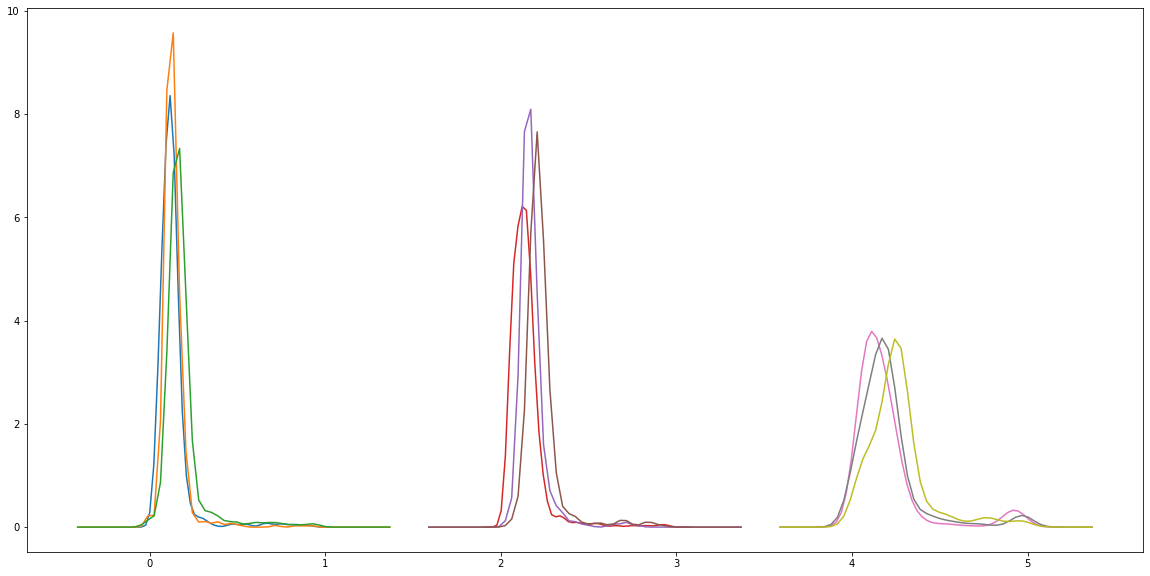

In [123]:
fig, ax = plt.subplots(figsize=(20,10))
# ax2 = ax.twinx()
# ax3 = ax2.twinx()
ax.plot(x11d,y11_d)
ax.plot(x11m,y11_m)
ax.plot(x11t, y11_t)
ax.plot(x12d+2,y12_d)
ax.plot(x12m+2, y12_m)
ax.plot(x12t+2, y12_t)
ax.plot(x13d+4, y13_d)
ax.plot(x13m+4, y13_m)
ax.plot(x13t+4, y13_t)
plt.show()

In [51]:
print("KL_divergence of User 1 distance 1 for desktop and mobile : "+str(kl_divergence(y11_d, y11_m)))
print("KL_divergence of User 1 distance 1 for desktop and tablet : "+str(kl_divergence(y11_d, y11_t)))
print("KL_divergence of User 1 distance 1 for mobile and tablet : "+str(kl_divergence(y11_m, y11_t)))

print("KL_divergence of User 1 distance 1 for desktop and distance 2 for desktop : "+str(kl_divergence(y11_d, y12_d)))
print("KL_divergence of User 1 distance 1 for mobile and distance 2 for mobile : "+str(kl_divergence(y11_m, y12_m)))
print("KL_divergence of User 1 distance 1 for tablet and distance 2 for tablet : "+str(kl_divergence(y11_t, y12_t)))

KL_divergence of User 1 distance 1 for desktop and mobile : 731.98708078003
KL_divergence of User 1 distance 1 for desktop and tablet : 388.863123676468
KL_divergence of User 1 distance 1 for mobile and tablet : 7.718699202130933
KL_divergence of User 1 distance 1 for desktop and distance 2 for desktop : 3.1077189835613033
KL_divergence of User 1 distance 1 for mobile and distance 2 for mobile : 10.498480738233525
KL_divergence of User 1 distance 1 for tablet and distance 2 for tablet : 12.53850197668671


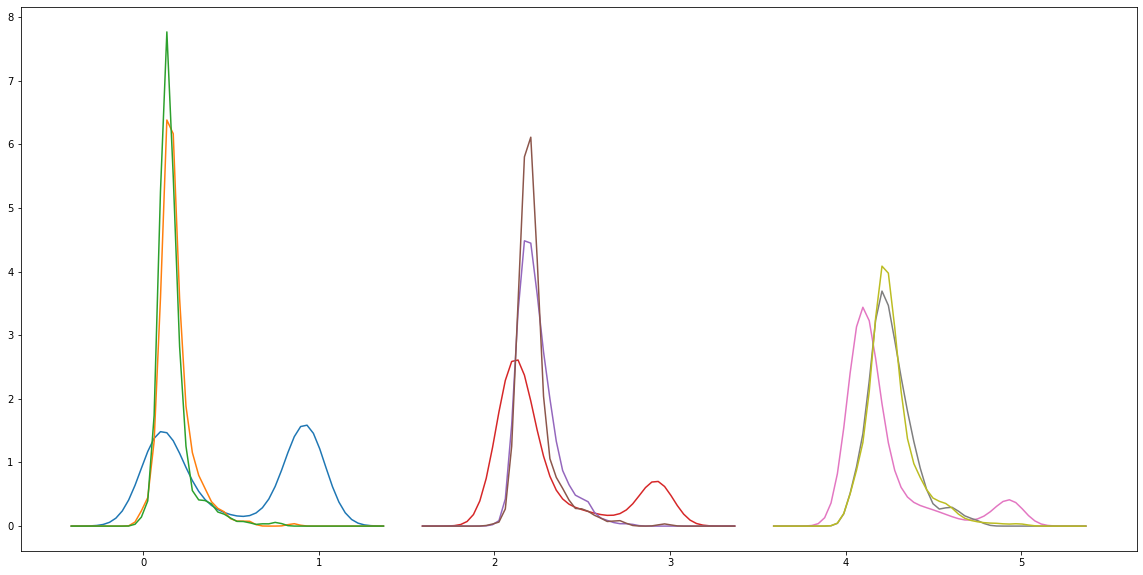

In [124]:
fig, ax = plt.subplots(figsize=(20,10))
# ax2 = ax.twinx()
# ax3 = ax2.twinx()
ax.plot(x21d,y21_d)
ax.plot(x21m,y21_m)
ax.plot(x21t, y21_t)
ax.plot(x22d+2,y22_d)
ax.plot(x22m+2, y22_m)
ax.plot(x22t+2, y22_t)
ax.plot(x23d+4, y23_d)
ax.plot(x23m+4, y23_m)
ax.plot(x23t+4, y23_t)
plt.show()

In [53]:
print("KL_divergence of User 2 distance 1 for desktop and mobile : "+str(kl_divergence(y21_d, y21_m)))
print("KL_divergence of User 2 distance 1 for desktop and tablet : "+str(kl_divergence(y21_d, y21_t)))
print("KL_divergence of User 2 distance 1 for tablte and mobile : "+str(kl_divergence(y21_t, y21_m)))

KL_divergence of User 2 distance 1 for desktop and mobile : 167.4333960882866
KL_divergence of User 2 distance 1 for desktop and tablet : 325.10735337355976
KL_divergence of User 2 distance 1 for tablte and mobile : 1.9212110117538803


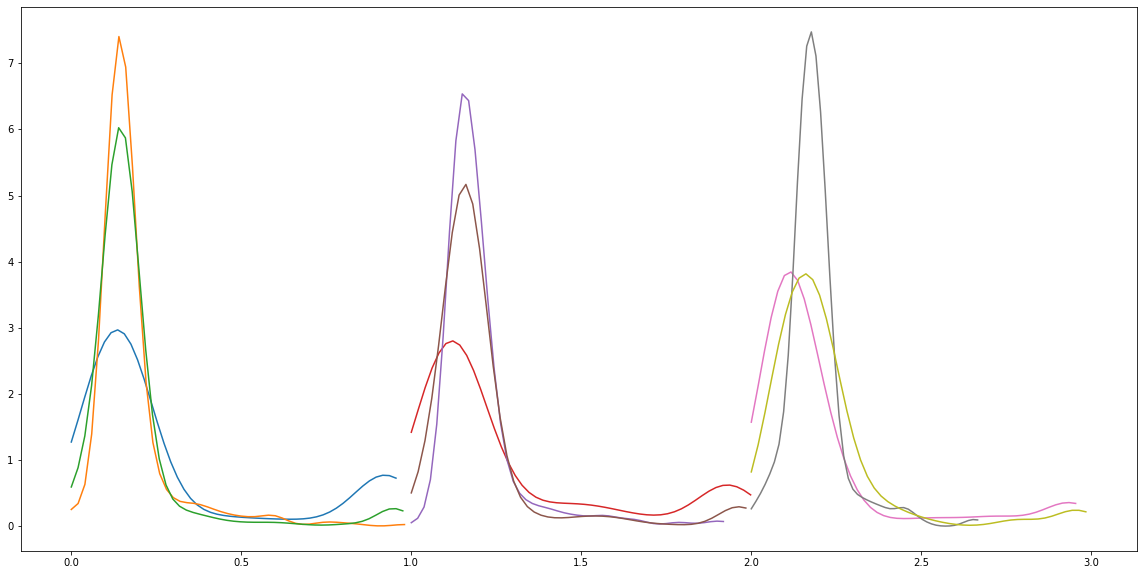

In [125]:
fig, ax = plt.subplots(figsize=(20,10))
# ax2 = ax.twinx()
# ax3 = ax2.twinx()
ax.plot(x451d,y451_d)
ax.plot(x451m, y451_m)
ax.plot(x451t, y451_t)
ax.plot(x452d+1,y452_d)
ax.plot(x452m+1, y452_m)
ax.plot(x452t+1, y452_t)
ax.plot(x453d+2, y453_d)
ax.plot(x453m+2, y453_m)
ax.plot(x453t+2, y453_t)
plt.show()

In [55]:
print("KL_divergence of User 1 distance 1 for desktop and User 2 distance 1 for desktop : "+str(kl_divergence(y11_d, y21_d)))
print("KL_divergence of User 1 distance 1 for mobile and User 2 distance 1 for mobile : "+str(kl_divergence(y11_m, y21_m)))
print("KL_divergence of User 1 distance 1 for tablet and User 2 distance 1 for tablet : "+str(kl_divergence(y11_t, y21_t)))


KL_divergence of User 1 distance 1 for desktop and User 2 distance 1 for desktop : 110.24770171043465
KL_divergence of User 1 distance 1 for mobile and User 2 distance 1 for mobile : 8.013459190987078
KL_divergence of User 1 distance 1 for tablet and User 2 distance 1 for tablet : 4.599769927070939
